In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit=pd.read_csv('Data/german_credit_data.csv')

In [3]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Cheking null values

In [4]:
credit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
credit['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [7]:
credit=credit.replace(np.nan,"doesn't exist", regex=True)

In [8]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,doesn't exist,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,doesn't exist,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
credit=credit.drop("Unnamed: 0", axis=1)

In [10]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,doesn't exist,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,doesn't exist,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
credit.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Visualisation

In [12]:
# we need to group Age for better visualisation - binning

In [13]:
credit['Age']

0      67
1      22
2      49
3      45
4      53
5      35
6      53
7      35
8      61
9      28
10     25
11     24
12     22
13     60
14     28
15     32
16     53
17     25
18     44
19     31
20     48
21     44
22     48
23     44
24     26
25     36
26     39
27     42
28     34
29     63
       ..
970    22
971    43
972    29
973    36
974    33
975    57
976    64
977    42
978    47
979    25
980    49
981    33
982    28
983    26
984    30
985    25
986    33
987    64
988    29
989    48
990    37
991    34
992    23
993    30
994    50
995    31
996    40
997    38
998    23
999    27
Name: Age, Length: 1000, dtype: int64

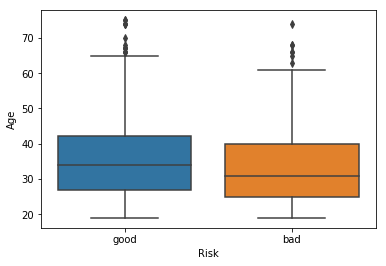

In [14]:
sns.boxplot(x='Risk',y='Age', data=credit)

Adding new column which contains data on customer Age

In [16]:
bins=(18,25,35,60,120)
group_names=['Student','Young','Adult','Senior']
credit['Age_cut']=pd.cut(credit['Age'], bins=bins, labels=group_names)

In [17]:
credit.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cut
0,67,male,2,own,doesn't exist,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student


Let's see relationships between age and accounts!

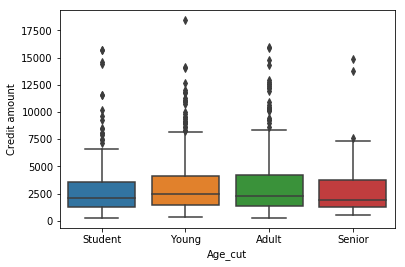

In [19]:
sns.boxplot(x='Age_cut',y='Credit amount', data=credit)

In [20]:
# we see that mean si aroun 2500

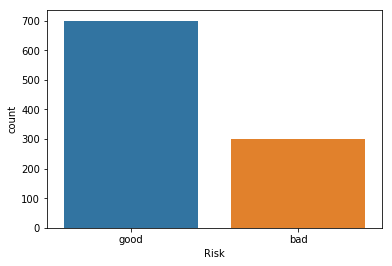

In [21]:
sns.countplot(credit['Risk'])

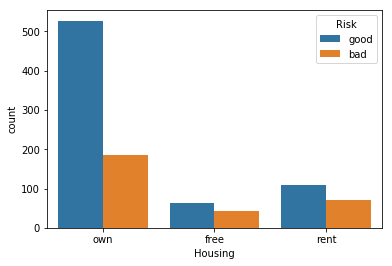

In [25]:
sns.countplot(credit['Housing'], hue=credit['Risk'])

In [26]:
# Distribution of housing and rent due to Risk

Difference by sex

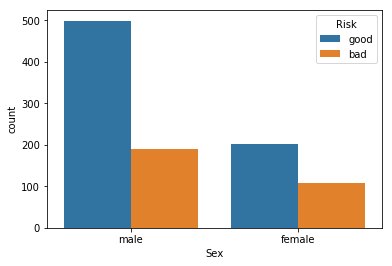

In [27]:
sns.countplot(credit['Sex'], hue=credit['Risk'])

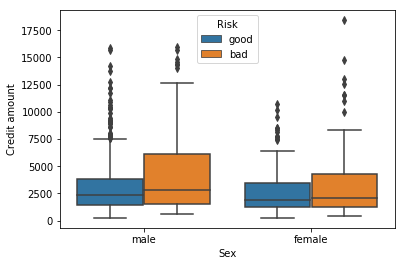

In [30]:
sns.boxplot(x='Sex',y='Credit amount', data=credit, hue='Risk')

Visualisation on job distribution

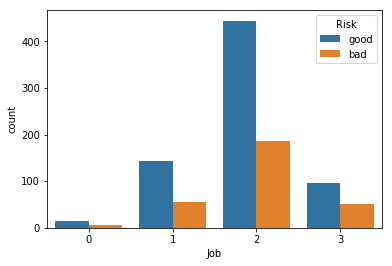

In [31]:
sns.countplot(credit['Job'], hue=credit['Risk'])

Job explanation:
*  0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

The most good clients are in skilled jobs.

Box plot on job and credit amount due to Risk

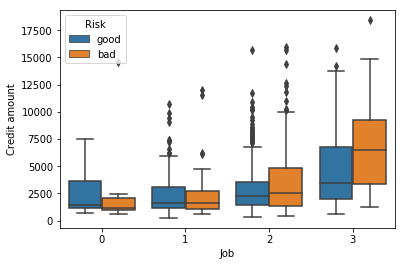

In [32]:
sns.boxplot(x='Job', y='Credit amount', data=credit, hue='Risk')

We can clearly see that better job, greater Credit amount.

Also on 1. and 2. job section there is lot of outliers

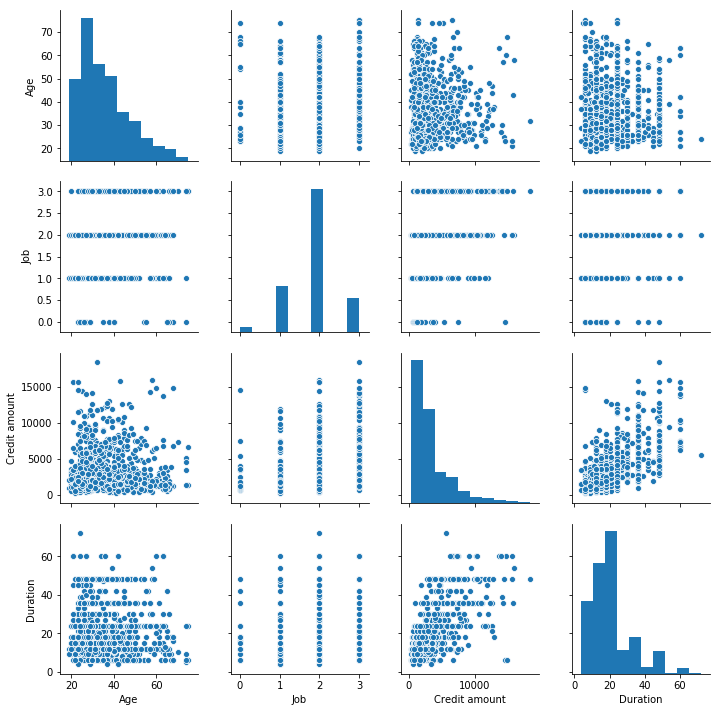

In [38]:
sns.pairplot(credit)

Let's see for saving accounts

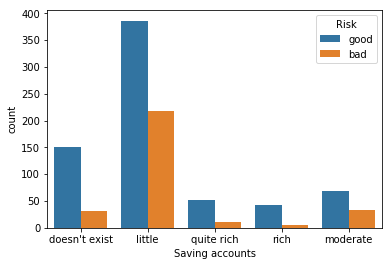

In [39]:
sns.countplot(credit['Saving accounts'], hue=credit['Risk'])

In [40]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
Age_cut             1000 non-null category
dtypes: category(1), int64(4), object(6)
memory usage: 79.4+ KB


columns type object we need to encode to numeric type

In [41]:
# also we can cut last column

In [42]:
credit=credit.drop('Age_cut', axis=1)

In [43]:
credit.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,doesn't exist,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


We use label encoder

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_sex=LabelEncoder()
credit['Sex']=label_sex.fit_transform(credit['Sex'])

In [46]:
label_housing=LabelEncoder()
credit['Housing']=label_housing.fit_transform(credit['Housing'])
label_sa=LabelEncoder()
credit['Saving accounts']=label_sa.fit_transform(credit['Saving accounts'])
label_ca=LabelEncoder()
credit['Checking account']=label_ca.fit_transform(credit['Checking account'])
label_p=LabelEncoder()
credit['Purpose']=label_p.fit_transform(credit['Purpose'])
label_r=LabelEncoder()
credit['Risk']=label_r.fit_transform(credit['Risk'])

In [47]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1,1169,6,5,1
1,22,0,2,1,1,2,5951,48,5,0
2,49,1,1,1,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0


1. Splitting the data to train and test
2. Now we can Standardize data because we have a lot of outliers in the credit amount

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
X=credit.drop('Risk', axis=1)
y=credit['Risk']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [55]:
# getting sc

In [56]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [57]:
#Heatmap

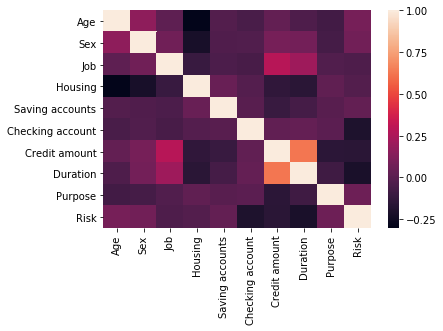

In [58]:
sns.heatmap(credit.corr())

Models:

1. Logistic Regression
2. Random Forest Classifier
3. KNN
4. SVM
5. Neural Networks

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
reg= LogisticRegression(random_state=0)
reg.fit(X_train,y_train)
reg_pred=reg.predict(X_test)
print(classification_report(y_test,reg_pred))
print(confusion_matrix(y_test,reg_pred))

             precision    recall  f1-score   support

          0       0.52      0.20      0.29        86
          1       0.74      0.93      0.82       214

avg / total       0.68      0.72      0.67       300

[[ 17  69]
 [ 16 198]]


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


             precision    recall  f1-score   support

          0       0.62      0.44      0.52        86
          1       0.80      0.89      0.84       214

avg / total       0.75      0.76      0.75       300

[[ 38  48]
 [ 23 191]]


In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
clas_pred=classifier.predict(X_test)
print(classification_report(y_test,clas_pred))
print(confusion_matrix(y_test,clas_pred))

             precision    recall  f1-score   support

          0       0.54      0.43      0.48        86
          1       0.79      0.85      0.82       214

avg / total       0.72      0.73      0.72       300

[[ 37  49]
 [ 32 182]]


In [63]:
from sklearn.svm import SVC
from sklearn import svm

clf=svm.SVC()
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
print(classification_report(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))

             precision    recall  f1-score   support

          0       0.65      0.28      0.39        86
          1       0.76      0.94      0.84       214

avg / total       0.73      0.75      0.71       300

[[ 24  62]
 [ 13 201]]


In [64]:
from sklearn.neural_network import MLPClassifier
nlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
nlpc.fit(X_train,y_train)
nlpc_pred=nlpc.predict(X_test)
print(classification_report(y_test,nlpc_pred))
print(confusion_matrix(y_test,nlpc_pred))

             precision    recall  f1-score   support

          0       0.58      0.47      0.52        86
          1       0.80      0.86      0.83       214

avg / total       0.74      0.75      0.74       300

[[ 40  46]
 [ 29 185]]
